In [21]:
from skimage import io, color, util, exposure, filters, morphology
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **1. [50] Diberikan citra virus.jpg berikut ini.**
<img src="Citra Tugas Lab 2\virus.jpg">

## a. Konversikan citra ini ke dalam color space CMY, lalu lakukan smoothing terhadap hasilnya dengan kernel 4x4

c:\Users\mirfa\Documents\Universitas Indonesia\Semester 5\Pengcit\Lab\env\lib\site-packages\IPython\core\interactiveshell.py:3441: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


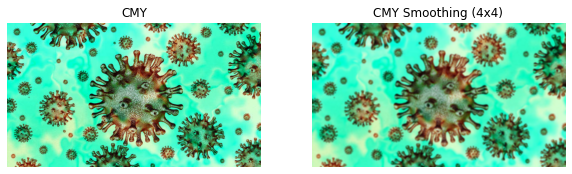

In [22]:
image = io.imread('Citra Tugas Lab 2/virus.jpg')
C = 1 - util.img_as_float(image[:, :, 0])
M = 1 - util.img_as_float(image[:, :, 1])
Y = 1 - util.img_as_float(image[:, :, 2])

CMY = np.zeros(image.shape)
CMY[:, :, 0] = C; CMY[:, :, 1] = M; CMY[:, :, 2] = Y

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1); plt.imshow(CMY, cmap="gray"); plt.title('CMY'); plt.axis('off')

CMY2 = util.img_as_ubyte(np.zeros(image.shape))
C2 = filters.rank.mean(C, selem=morphology.square(4))
M2 = filters.rank.mean(M, selem=morphology.square(4))
Y2 = filters.rank.mean(Y, selem=morphology.square(4))

CMY2[:, :, 0] = C2; CMY2[:, :, 1] = M2; CMY2[:, :, 2] = Y2

plt.subplot(1, 2, 2); plt.imshow(CMY2, cmap="gray"); plt.title('CMY Smoothing (4x4)'); plt.axis('off')
plt.show()

## b. Konversikan citra ini ke dalam color space CMY, lalu lakukan smoothing terhadap hasilnya dengan kernel 9x9

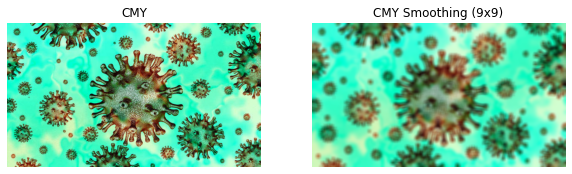

In [23]:
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1); plt.imshow(CMY, cmap="gray"); plt.title('CMY'); plt.axis('off')

CMY3 = util.img_as_ubyte(np.zeros(image.shape))
C3 = filters.rank.mean(C, selem=morphology.square(9))
M3 = filters.rank.mean(M, selem=morphology.square(9))
Y3 = filters.rank.mean(Y, selem=morphology.square(9))

CMY3[:, :, 0] = C3; CMY3[:, :, 1] = M3; CMY3[:, :, 2] = Y3

plt.subplot(1, 2, 2); plt.imshow(CMY3, cmap="gray"); plt.title('CMY Smoothing (9x9)'); plt.axis('off')
plt.show()

## c. Bandingkan hasil citra pada poin a dan b

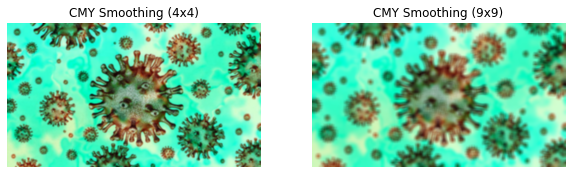

In [24]:
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1); plt.imshow(CMY2, cmap="gray"); plt.title('CMY Smoothing (4x4)'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(CMY3, cmap="gray"); plt.title('CMY Smoothing (9x9)'); plt.axis('off')
plt.show()

## d. Lakukan clustering menggunakan metode k-mean clustering dengan k = 4

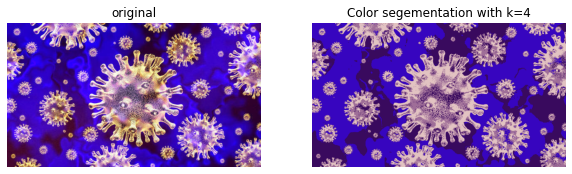

In [25]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixel_values = image2.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS +
cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image =segmented_image.reshape(image2.shape)

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1); plt.imshow(image2); plt.title("original"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(segmented_image); plt.title("Color segementation with k=4"); plt.axis("off")
plt.show()

## e. Lakukan clustering menggunakan metode k-mean clustering dengan k = 9

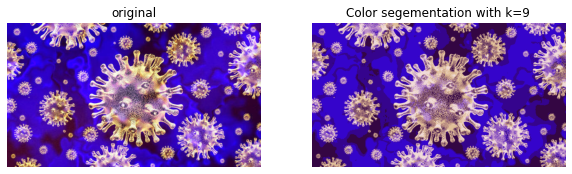

In [26]:
pixel_values = image2.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS +
cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 9
_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image =segmented_image.reshape(image2.shape)

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1); plt.imshow(image2); plt.title("original"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(segmented_image); plt.title("Color segementation with k=9"); plt.axis("off")
plt.show()

## f. Ceritakan perbedaan yang kamu dapatkan pada poin d dan e, serta jelaskan mengapa perbedaan tersebut bisa terjadi

Perbedaan yang didapat antara gambar pada bagian d dan e adalah, citra pada bagian e terdapat lebih banyak pengelompokan dibanding dengan citra pada bagian d. Terjadi perbedaan karena nilai k (jumlah cluster yang dibuat) pada citra e lebih besar dibanding citra d sehingga lebih banyak pula segmentasi warna yang terbentuk. 

## **2. [50] Diberikan citra bird.jpg berikut ini.**
<img src="Citra Tugas Lab 2\bird.jpg">

## a. Terapkan sharpening pada gambar tersebut untuk ketiga channel R, G, dan B.

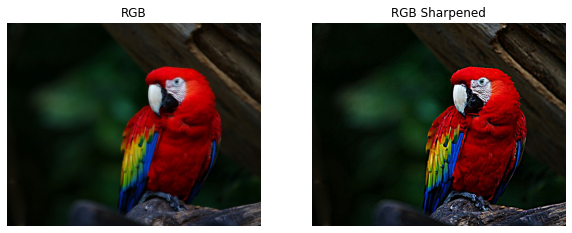

In [27]:
image2 = io.imread('Citra Tugas Lab 2/bird.jpg')
R = image2[:, :, 0]
G = image2[:, :, 1]
B = image2[:, :, 2]

RGB = util.img_as_ubyte(np.zeros(image2.shape))
RGB[:, :, 0] = R; RGB[:, :, 1] = G; RGB[:, :, 2] = B

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1); plt.imshow(RGB, cmap="gray"); plt.title('RGB'); plt.axis('off')

RGB2 = np.zeros(image2.shape)
R2 = filters.unsharp_mask(R, radius=5, amount=2)
G2 = filters.unsharp_mask(G, radius=5, amount=2)
B2 = filters.unsharp_mask(B, radius=5, amount=2)

RGB2[:, :, 0] = R2; RGB2[:, :, 1] = G2; RGB2[:, :, 2] = B2

plt.subplot(1, 2, 2); plt.imshow(RGB2, cmap="gray"); plt.title('RGB Sharpened'); plt.axis('off')
plt.show()

## b. Terapkan contrast stretching terhadap ketiga channel R, G dan B lalu tampilkan hasilnya sebagai satu citra!

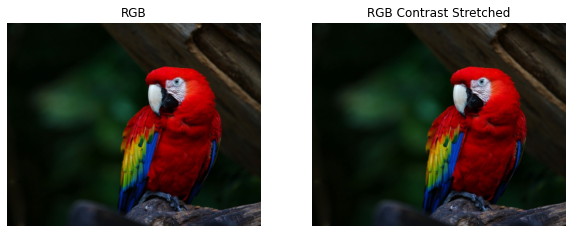

In [28]:
def contrast_stretch(img):
    mn = min(img.flatten())
    mx = max(img.flatten())
    b = int(np.floor(255 / (mx - mn)))
    return (img - mn) * b

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1); plt.imshow(RGB, cmap="gray"); plt.title('RGB'); plt.axis('off')
# plt.subplot(1, 2, 1); plt.hist(B.flatten(), 256, range=(0,256)); plt.title('RGB')

RGB3 = util.img_as_ubyte(np.zeros(image2.shape))

RGB3[:, :, 0] = contrast_stretch(R)
RGB3[:, :, 1] = contrast_stretch(G)
RGB3[:, :, 2] = contrast_stretch(B)

plt.subplot(1, 2, 2); plt.imshow(RGB3, cmap="gray"); plt.title('RGB Contrast Stretched'); plt.axis('off')
# plt.subplot(1, 2, 2); plt.hist(RGB3[:, :, 2].flatten(), 256, range=(0,256)); plt.title('RGB Contrast Stretched')
plt.show()

## c. Lakukan konversi gambar bird.jpg tersebut menjadi bentuk citra HSV! Terapkan sharpening pada gambar tersebut pada channel V. Jangan lupa untuk mengubah citra HSV menjadi RGB terlebih dahulu sebelum ditampilkan.

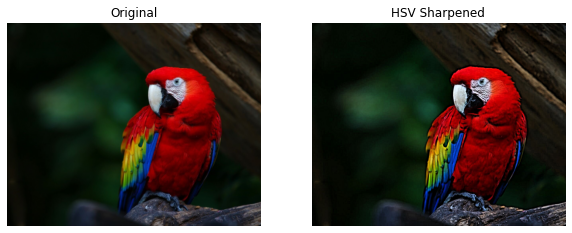

In [40]:
HSV = color.rgb2hsv(image2)
H = HSV[:, :, 0]
S = HSV[:, :, 1]
V = HSV[:, :, 2]

HSVasRGB = color.hsv2rgb(HSV)

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1); plt.imshow(HSVasRGB); plt.title('Original'); plt.axis('off')

HSV2 = np.zeros(image2.shape)
V2 = filters.unsharp_mask(V, radius=5, amount=2)

HSV2[:, :, 0] = H; HSV2[:, :, 1] = S; HSV2[:, :, 2] = V2

HSV2asRGB = color.hsv2rgb(HSV2)

plt.subplot(1, 2, 2); plt.imshow(HSV2asRGB); plt.title('HSV Sharpened'); plt.axis('off')
plt.show()

## d. Terapkan contrast stretching terhadap channel V lalu tampilkan hasilnya sebagai satu citra! Jangan lupa untuk mengubah citra HSV menjadi RGB terlebih dahulu sebelum ditampilkan.

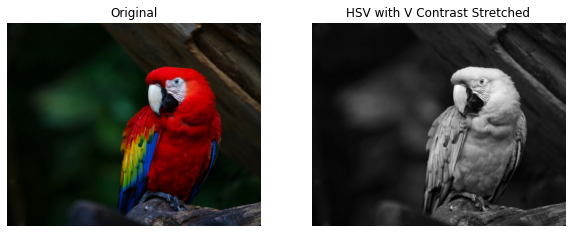

In [41]:
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1); plt.imshow(HSVasRGB); plt.title('Original'); plt.axis('off')
# plt.subplot(1, 2, 1); plt.hist(V.flatten(), 256, range=(0,256)); plt.title('Original')

HSV3 = util.img_as_ubyte(np.zeros(image2.shape))

HSV3[:, :, 0] = H
HSV3[:, :, 1] = S
HSV3[:, :, 2] = contrast_stretch(V)

HSV3asRGB = color.hsv2rgb(HSV3)

plt.subplot(1, 2, 2); plt.imshow(HSV3asRGB); plt.title('HSV with V Contrast Stretched'); plt.axis('off')
# plt.subplot(1, 2, 2); plt.hist(HSV3[:, :, 2].flatten(), 256, range=(0,256)); plt.title('V Contrast Stretched')
plt.show()

## e. Ceritakan perbedaan dari citra awal, citra hasil sharpening, dan hasil contrast stretching pada channel RGB dan channel V (hint: gunakan histogram untuk menunjukkan perbedaan)

### **1. Citra Awal**
Jika dibandingkan histogram dari citra RGB dengan citra V pada citra awal, tidak terlihat perbedaan yang signifikan diantara kedua histogram. Hal ini dikarenakan citra RGB berhubungan dengan banyaknya cahaya yang dipantulkan suatu objek. Nilai V dari HSV merupakan "value" atau kecerahan dalam suatu citra. Tidak salah apabila histogram yang dihasilkan citra RGB dan channel V citra HSV serupa.

### **2. Citra Hasil Sharpening**
Kedua citra setelah dilakukan sharpening sama-sama memiliki nilai tinggi pada nilai sekitar 0 dan nilai sekitar 255. Ini dikarenakan saat melakukan sharpening terdapat beberapa bagian dari citra yang dibuat seperti outline.

### **3. Citra Hasil Contrast Stretching**
Kedua citra hasil contrast stretching tidak jauh berbeda dengan citra awal. Ini dikarenakan pada citra awal, kontras sudah berada pada range yang dekat dengan ujung-ujung range 0-255.

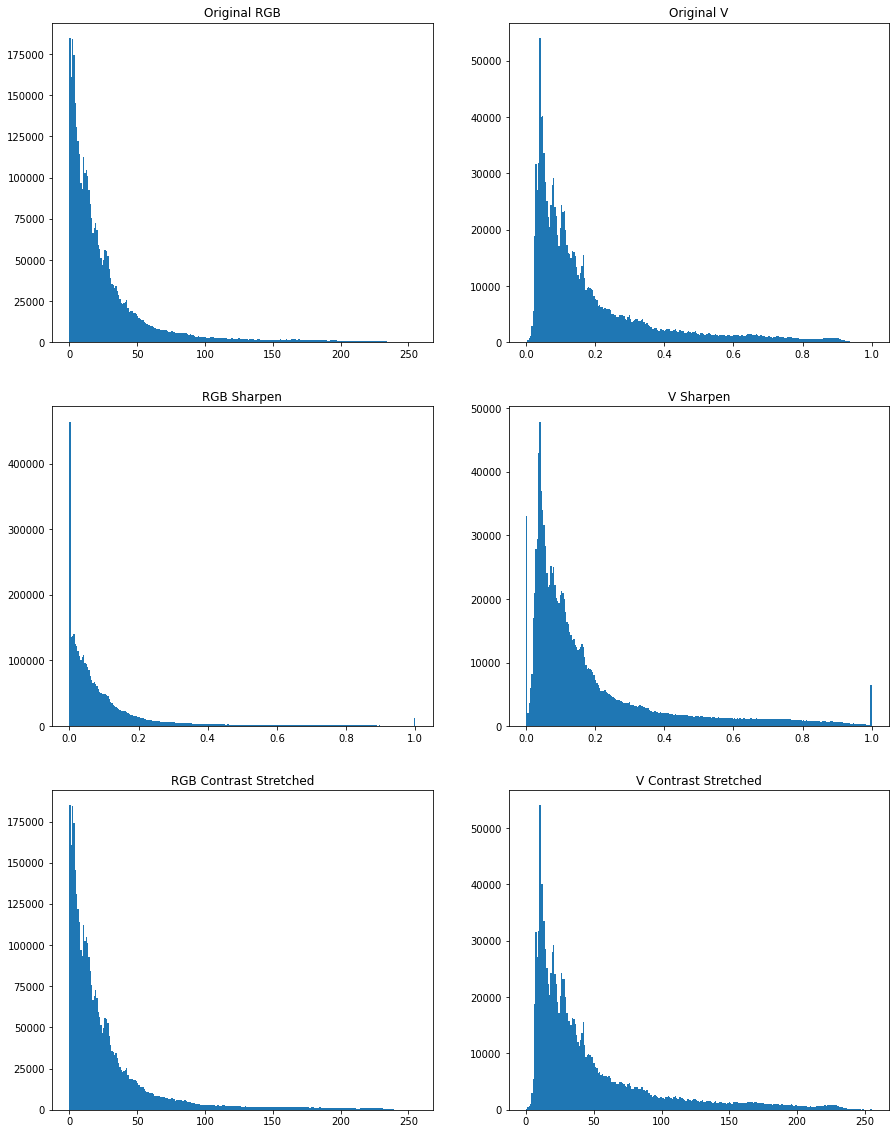

In [51]:
plt.figure(figsize=(15,20))

plt.subplot(3, 2, 1); plt.hist(RGB.flatten(), bins=256); plt.title('Original RGB')

plt.subplot(3, 2, 2); plt.hist(V.flatten(), bins=256); plt.title('Original V')

plt.subplot(3, 2, 3); plt.hist(RGB2.flatten(), bins=256); plt.title('RGB Sharpen')

plt.subplot(3, 2, 4); plt.hist(V2.flatten(), bins=256); plt.title('V Sharpen')

plt.subplot(3, 2, 5); plt.hist(RGB3.flatten(), bins=256); plt.title('RGB Contrast Stretched')

plt.subplot(3, 2, 6); plt.hist(contrast_stretch(V).flatten(), bins=256); plt.title('V Contrast Stretched')

plt.show()